In [11]:
list(range(6, 13))

[6, 7, 8, 9, 10, 11]

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I will clean this up in a hot minute i swear "Judith

pcpt_raw = pd.read_csv("weather data.csv")
wprod_raw = pd.read_csv("wheat production.csv")

#remove unecesary columns
wprod = wprod_raw.drop(wprod_raw.columns[list(range(6, 13))], axis = 1)

#remove rows 243 to 249 for production data
wprod = wprod.drop(list(range(243, 250)))
#remove 2024 data for weather data
pcpt_raw = pcpt_raw.drop(list(range(408, 410)))

#assign column names
wprod.columns = ['Year', 'Quarter', 'Beginning stocks', 'Production', 'Imports', 'Total supply']

#drop empty rows to get yearly production data
test = wprod.dropna(subset = ['Year','Production'])
test = test.reset_index(drop = True)
y1 = list(map(str, list(range(1975, 2024))))
y2 = list(map(str, list(range(1976, 2025))))
test.loc[:, 'Year'] = [u+'/'+i for u, i in zip(y1, y2)]

#remove years before 1990 (so first entry is now 1990/1991)
test_red = test.drop(list(range(0, 15))).reset_index(drop=True)

#pcpt_raw
#(np.arange(len(df))//2).mean()
#pcpt_year = pcpt_raw.groupby(np.arange(len(pcpt_raw))//12).mean()

# now merge yearly precipitation with yearly production
year = list(range(1990, 2024)) # length is 34

df = pd.DataFrame([year, test_red['Production'], pcpt_year['Value']]).T
df.columns = ['Year', 'Production', 'Precipitation']
df = df.set_index('Year')
df["Production"] = df["Production"].str.replace(",","").astype(float)
df["Precipitation"] = df["Precipitation"].astype(float)

,Production,Precipitation
Year,,
1990,2730.0,2.680833
1991,1980.0,2.703333
1992,2467.0,2.605000
1993,2396.0,2.718333
1994,2321.0,2.551667
1995,2183.0,2.724167
1996,2277.0,2.808333
1997,2481.0,2.655000
1998,2547.0,2.824167


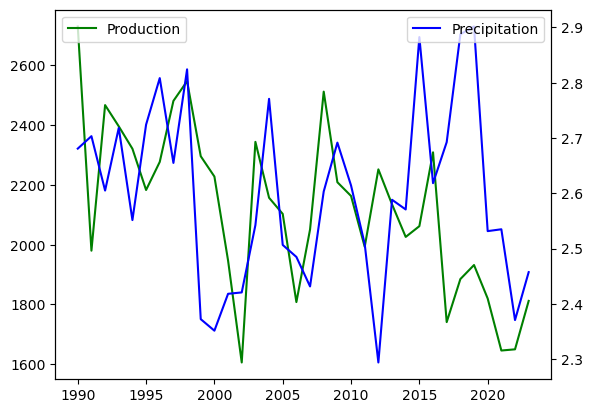

In [182]:
import matplotlib.pyplot as plt

x = df.index
y1 = df['Production']
y2 = df['Precipitation']

fig, ax1 = plt.subplots()

# Duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# Plot data on the first y-axis
ax1.plot(x, y1, color ='green', label='Production')
#ax1.set_yticks(np.arange(1, 3, step = 0.25))
#plt.yticks(np.arange(-1, 1.5, step=0.5))
#ax1.set_xlabel('Yearly price starting in 1990')
#ax1.set_ylabel('Oil Price per barrel', color='black')

# Plot data on the second y-axis
ax2.plot(x, y2, color = 'blue', label='Precipitation') #The data was collected by the International Montetary Fund
#ax2.set_ylabel('Wheat Prices per metric ton', color='black')

# Display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# check if the production changes with price, maybe lower price prompts less production of wheat

In [192]:
df["Production"].corr(df["Precipitation"])

0.22120974437433139